In [155]:
from IPython.lib.display import YouTubeVideo
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, LinearRegression,Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

df = pd.read_excel('pH Relation.xlsx')
#Clean DATE
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'] = df['DATE'].dt.date

#Delete blank
df = df.dropna(subset=['pH'], axis=0)
df = df.dropna(subset=['Ammonia/ppm'], axis=0)
df = df.dropna(subset=['Sulfide/ppm'], axis=0)
df = df.dropna(subset=['Chloride/ppm'], axis=0)
# #Clean crude diet
# label_encoder = LabelEncoder()
# df['Numerical_diet'] = label_encoder.fit_transform(df['Crude diet'])

# df['H+'] = df['pH'].apply(lambda x: math.exp(-x))
# df['Ammonia/ppb'] = df['Ammonia/ppm']*1000
# df['Sulfide/ppb'] = df['Sulfide/ppm']*1000
# df['Chloride/ppb'] = df['Chloride/ppm']*1000
#resetindex
df.reset_index(drop=True, inplace=True)
#plot
# sns.scatterplot(data = df, x = "pH", y='Ammonia/ppm')
# plt.show()
# sns.scatterplot(data = df, x = "pH", y='Sulfide/ppm')
# plt.show()
# sns.scatterplot(data = df, x = "pH", y='Chloride/ppm')
# plt.show()

















In [158]:
# Split the 'Crude diet' column into a list of values
df['Crude diet'] = df['Crude diet'].str.split('-')

# Explode the lists in the 'Crude diet' column to create multiple rows
df = df.explode('Crude diet')

# Create a DataFrame with the split 'Crude ratio' values, and replace NaN with 0
crude_ratio_df = df['Crude ratio'].str.split('-', expand=True).fillna(0).astype(int)

# Concatenate the 'Crude diet' values and the split 'Crude ratio' DataFrame
result_df = pd.concat([df['Crude diet'], crude_ratio_df], axis=1)

# Pivot the DataFrame to create the desired wide format, summing up values with the same 'Crude diet'
pivot_df = result_df.pivot_table(index=result_df.index, columns='Crude diet', values=result_df.columns[1:], aggfunc='first')

# Reset the index and optionally fill NaN values with 0
pivot_df = pivot_df.fillna(0).astype(int).reset_index(drop=True)

# Save the resulting DataFrame to a new Excel file (replace 'output_file.xlsx' with your desired file name)
# pivot_df.to_excel('output_file.xlsx', index=False)

In [122]:
pivot_df

Crude diet,,ALB,BEN,BER,BUG,BUO,CHA,CHI,DAR,DJ1,...,SIB,SKR,SLGO,SMB,SSR,SUT,SVD,SWD,UJU,WTM
1,0,0,32,0,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,32,32
2,0,0,32,0,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,32,32
3,0,0,0,0,0,0,0,0,0,0,...,25,0,25,0,0,0,25,25,25,25
4,0,0,0,0,0,0,0,0,0,0,...,25,0,25,0,0,0,25,25,25,25
5,0,0,30,0,0,0,0,0,0,0,...,30,0,0,0,0,0,0,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,34,0,0,34
136,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,34,0,0,34
137,0,0,0,0,44,0,0,44,0,0,...,44,0,0,0,0,0,44,0,0,44
138,44,0,0,0,0,0,44,0,0,0,...,44,0,0,0,0,0,44,0,44,0


In [ ]:
excel_file = "export06.xlsx"
df.to_excel(excel_file, index=False)

In [ ]:
df.head()

,DATE,IOW(In/Out),pH,Ammonia/ppm,Sulfide/ppm,Chloride/ppm,Iron/ppm,Oil&Grease/ppm,DO/ppm,Crude diet,Crude ratio,Numerical_diet
0,2022-12-05,0.0,5.02,6.0,0.045,2.200,2.630,0.0,7.0,NaN,NaN,73
1,2022-12-06,0.0,5.5,2.0,0.034,1.020,0.500,0.0,6.0,BEN-WTM-UJU-PAT-SIB-SHGO-GIR,32-23-17-17-5-3-2,2
2,2022-12-07,0.0,5.5,9.0,0.088,1.028,0.610,0.0,7.0,BEN-WTM-UJU-PAT-SIB-SHGO-GIR,32-23-17-17-5-3-3,2
3,2022-12-22,1.0,8.58,18.0,0.070,0.709,0.516,0.0,4.0,GIR-UJU-WTM-SLGO-SIB-SHGO-SWD-KIS-JSM-SVD,25-15-14-11-9-8-7-6-4-1,25
4,2022-12-23,1.0,8.58,18.0,0.070,0.709,0.516,0.0,4.0,GIR-UJU-WTM-SLGO-SIB-SHGO-SWD-KIS-JSM-SVD,25-15-14-11-9-8-7-6-4-1,25


In [ ]:
#Coleration
X = df.loc[:,['Ammonia/ppm', 'Sulfide/ppm', 'Chloride/ppm','',]]
Y = df['IOW(In/Out)']

In [ ]:
# Split data
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

In [ ]:
clf = DecisionTreeClassifier()

# Step 5: Train the Decision Tree classifier on the training data
clf.fit(X_train, Y_train)

# Step 6: Make predictions on the testing data
Y_pred = clf.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
# classification_rep = classification_report(Y_test, Y_pred, target_names="Out IOW")
# print("Classification Report:\n", classification_rep)

Accuracy: 0.66


<ipython-input-53-680996ee7399>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


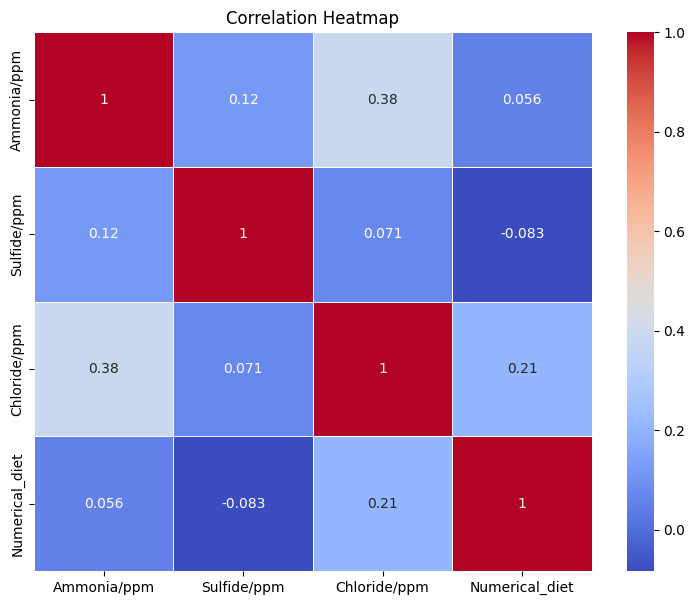

In [ ]:
# Find correlation
# df = df[['H+','Ammonia/ppb', 'Sulfide/ppb', 'Chloride/ppb']]
df = df[['pH','Ammonia/ppm', 'Sulfide/ppm', 'Chloride/ppm','']]
correlation_matrix = df.corr()
correlation_matrix
# Create a correlation heatmap
plt.figure(figsize=(9, 7))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)



# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Regression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
# Make predictions
Y_pred = model.predict(X_test)
# sns.scatterplot(data = df, x = "Y_test", y='Y_pred')
# plt.show()



In [ ]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r1 = r2_score(Y_test, Y_pred)

In [ ]:
print("Evaluation")

print("MSE",mse)
print("RMSE",rmse)
print(f'R-squared : {r1}')

Evaluation
MSE 1.0447288440986076
RMSE 1.0221197797218327
R-squared : 0.06973681355031791


In [ ]:
#Scale data
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#ทำ Ridge Regularization เพื่อ improve model
#ทำ Hyperparameter tuning บน training set โดยใช้ k-fold crossvalidation เพื่อหา best hyperparameter

reg = RidgeCV(alphas=np.logspace(-10, 10, 1000),
              cv=KFold(n_splits=10, shuffle=True),
              scoring='neg_root_mean_squared_error')
reg.fit(X_train_scaled, Y_train)
print("Best alpha : ", reg.alpha_ )

Best alpha :  10000000000.0


In [ ]:
#นำ best hyperparameter มา train บน training set
ridge = Ridge(alpha=reg.alpha_)
ridge.fit(X_train_scaled, Y_train)
print("Ridge Regression: \n")
print("Mean squared error (MSE) = {}".format(metrics.mean_squared_error(Y_test, ridge.predict(X_test_scaled))))
print(f'Root mean squared error (RMSE):{np.sqrt(metrics.mean_squared_error(Y_test, ridge.predict(X_test_scaled)))}')
y2_pred = ridge.predict(X_test_scaled)
r2 = r2_score(Y_test, y2_pred)
print(f'R-squared : {r2}')

Ridge Regression: 

Mean squared error (MSE) = 6.873128244694761e-07
Root mean squared error (RMSE):0.0008290433188136047
R-squared : -0.003644338706559447


In [ ]:
#ทำ Lasso Regularization เพื่อ improve model
#ทำ Hyperparameter tuning บน training set โดยใช้ k-fold crossvalidation เพื่อหา best hyperparameter
lasso = LassoCV(alphas=np.logspace(-10, 10, 1000),
              cv=KFold(n_splits=10, shuffle=True))
lasso.fit(X_train_scaled, Y_train)
print("Best alpha : ", lasso.alpha_)

Best alpha :  10000000000.0


In [ ]:
#นำ best hyperparameter มา train บน training set
lasso_a = Lasso(alpha=lasso.alpha_)
lasso_a.fit(X_train_scaled, Y_train)
print("Lasso Regression: \n")
print("Mean squared error (MSE) = {}".format(metrics.mean_squared_error(Y_test, lasso_a.predict(X_test_scaled))))
print(f'Root mean squared error (RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, lasso_a.predict(X_test_scaled)))}')
y_pred = lasso_a.predict(X_test_scaled)
r = r2_score(Y_test, y_pred)
print(f'R-squared : {r}')

Lasso Regression: 

Mean squared error (MSE) = 1.5906512048101553e-06
Root mean squared error (RMSE): 0.0012612102143616485
R-squared : -0.022721079153315227


In [ ]:
#ทำ Exponential Regression model โดย improve model ด้วย Lasso Regularization
degree = 2

# Standardize the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train)
X_test_poly = scaler.transform(X_test)

# Create a Polynomial Features transformer
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_poly)
X_test_poly = poly_features.fit_transform(X_test_poly)


# Create and train the Lasso Regression model
lasso_poly = LassoCV(alphas=np.logspace(-10, 10, 1000),
              cv=KFold(n_splits=10, shuffle=True))
lasso_poly.fit(X_train_poly, Y_train)

lasso_polyb = Lasso(alpha=lasso_poly.alpha_)
lasso_polyb.fit(X_train_poly, Y_train)

print('Lasso Exponential Regression: \n')

print("Best alpha = {}, MSE = {}".format(lasso_poly.alpha_, metrics.mean_squared_error(Y_test, lasso_polyb.predict(X_test_poly))))
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(Y_test, lasso_polyb.predict(X_test_poly)))}')
y4_pred = lasso_polyb.predict(X_test_poly)
r4 = r2_score(Y_test, y4_pred)
print(f'R-squared : {r4}')

Lasso Exponential Regression: 

Best alpha = 2.543345761304648e-05, MSE = 1.573077217053099e-06
RMSE = 0.0012542237507929353
R-squared : -0.011421752393575346


In [ ]:
#ทำ Exponential Regression model โดย improve model ด้วย Ridge Regularization
degree = 2
# Standardize the features
scaler_r = StandardScaler()
X_train_poly_r = scaler_r.fit_transform(X_train)
X_test_poly_r = scaler_r.fit_transform(X_test)

# Create a Polynomial Features transformer
poly_features_r = PolynomialFeatures(degree=degree)
X_train_poly_r = poly_features_r.fit_transform(X_train_poly_r)
X_test_poly_r = poly_features_r.fit_transform(X_test_poly_r)

# Create and train the Lasso Regression model
ridge_poly = RidgeCV(alphas=np.logspace(-10, 10, 1000),
              cv=KFold(n_splits=10, shuffle=True))
ridge_poly.fit(X_train_poly_r, Y_train)

lin_poly = Ridge(alpha=ridge_poly.alpha_)
lin_poly.fit(X_train_poly_r, Y_train)

print('Ridge Exponential Regression: \n')

print("Best alpha = {}, MSE = {}".format(ridge_poly.alpha_, metrics.mean_squared_error(Y_test, lin_poly.predict(X_test_poly_r))))
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(Y_test, lin_poly.predict(X_test_poly_r)))}')
y5_pred = lin_poly.predict(X_test_poly_r)
r5 = r2_score(Y_test, y5_pred)

print(f'R-squared : {r5}')

Ridge Exponential Regression: 

Best alpha = 67.89406812696099, MSE = 1.566009454407663e-06
RMSE = 0.0012514029944057441
R-squared : -0.006877481582928002
